# Capstone Project

### Week 5: Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

## Table of Content
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#method)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)
7. [Reference](#reference)

## 1. Introduction: Business Problem <a name="introduction"></a>

"A Big Catering Company" (ABC Company) is a medium sized catering company based in Hong Kong, which owns 1 steak house and 10 Japanese restaurants in Hong Kong island. In 2019, ABC Company is going to open a restaurant at "Tseung Kwan O", where is a fast growing residental area locates at the eastern part of Kowloon Penisula. 

As the rent in Hong Kong is extremely high, ABC company decides to use Data Science techniques to produce more insights that are helpful for senior management to determine where is the most profit making place and what kind of food that welcomed by the surrounding residents most.

Since last year, there are over a half million of population moved into Tseung Kwan O area, and many new restaurants are opened. ABC Company wish to open a restaurant. Their requirements are given below:
1. The company wishes to open Japanese style restaurant or steak house so that they don't need extra cost to setup the menu of another kind of food
2. They want to bring something new to the community, i.e. the new restaurant will provide different kind of food that the local residents never tried in their home region.
3. They want the restaurant's surrounding has sufficient electric EV charging locations.

After solving the problem, we expect the results could provide information for determining:
1. what kind of restaurant the company should open.
2. where would the company open the restaurant.


## 2. Data <a name="data"></a>

We will utilize the information from the following two datasets to solve the problem:

1. First, we will use information by Foursquare API. It contains restaurant categories, location data (i.e. lat long), ratings and could be retrieved according to a given location of interest.
2. Second, we will use the "Electric vehicle charging station locations" open dataset provided by the Hong Kong government. By giving a location, the location of the charging stations could be found. We could count  the number of nearby charging stations and this form part of the decision making criteria. The URL is: https://data.gov.hk/en-data/dataset/clp-team1-electric-vehicle-charging-location




### 2.1 Description of the Data
 
Before the actual analysis, Let's take a look of the data. We will introduce what information that contained in the two datasets: (1) The Foursquare Place API, and (2) Open Dataset of "Electric vehicle charging station locations" by Hong Kong Government.

First of all, we import the necessary libraries as follows:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 2.2 The Foursquare Place API

The Foursquare Place API provides an easy method for data scientists to access to geolocation information by querying any place of interest. To use the Foursquare API, we need to open an account and obtain a pair of client ID and secret key (We hide the ID/key here for security reason). 

In [2]:
# The code was removed by Watson Studio for sharing.

With the Foursquare API, we can tell people where they are, recommend a place, find a specific place nearby, and get tips on a given place. In this project, we will find a specific place nearby a target location. We will call the API with the following code:

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(<br>
    &nbsp;&nbsp; CLIENT_ID, <br>
    &nbsp;&nbsp; CLIENT_SECRET, <br>
    &nbsp;&nbsp; VERSION, <br>
    &nbsp;&nbsp; latitude, <br>
    &nbsp;&nbsp; longitude, <br>
    &nbsp;&nbsp; radius, <br>
    &nbsp;&nbsp; LIMIT)<br>
<br>
where<br> 
* input "client_id" and "client_secret" = Foursquare account login ID/key
* input "v" = API version
* input "ll" = {latitude, longitude} i.e. the global coordinates of the target location 
* input "limit" = limit of number of venues returned by Foursquare API
* input "radius" = define radius around the target location
* output is in JSON format, results is represented in a list in ascending order of distance to the specified location

The latitude and longitude of the target location can be looked up by the geolocator imported from the Nominatim library (please refer to the "import" code snippet above). The example below shows how to get the latitude and longitude of Hong Kong.

In [3]:
address = 'Hong Kong'

geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


Next, we will display all the venues nearby a target location -- the center of Hong Kong within a range of 500 meters using the Foursquare Place API. The code and example result will be shown below. This is the raw data that contains all venues. 

In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
#url # display URL

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cd8fd3d9fb6b7571a319e32'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b0588d2f964a5208bdb22e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '4b0588d2f964a5208bdb22e3',
       'location': {'address': '19 Cotton Tree Dr',
        'cc': 'HK',
        'city': '中環',
        'country': '香港',
        'distance': 206,
        'formattedAddress': ['19 Cotton Tree Dr', '中西區', '香港'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 22.27769953093909,
          'lng': 114.16185379028319}],
        'lat'

As shown above, we can obtain useful information such as the venue, categories, id, name, city, country, formattedAddress, and distance to the target location (longitute and latitude) etc. In our project, we are going to select venues by "categories" for further analysis.

### 2.3 The Open Dataset of "Electric vehicle charging station locations"

The second dataset is the Open Dataset of "Electric vehicle charging station locations". Thie dataset is owned by CLP POWER HONG KONG LIMITED, which is a major electricity provider in Hong Kong, and made available by the Hong Kong SAR government. As the electricity vehicle charging stations are set up by CLP, CLP knows the most updated locations of the charging stations.


url2 = "https://api.data.gov.hk/v1/nearest-clp-electric-vehicle-charging-stations?lat={}&long={}&max={}".format( <br>
    &nbsp;&nbsp; latitude,<br>
    &nbsp;&nbsp; longitude, <br>
    &nbsp;&nbsp; max_results   <br>
)<br>
<br>
where<br>
* input "lat' = Latitude of enquiry location (WGS84)
* input "long" = Longitude of enquiry location (WGS84)
* input "max" = Maximum number of results returned (default: all, limit:100)
* output is in JSON format, results is represented in a list in ascending order of distance to the specified location



In [5]:
max_results = 2

url2 = "https://api.data.gov.hk/v1/nearest-clp-electric-vehicle-charging-stations?lat={}&long={}&max={}".format(
    latitude,
    longitude, 
    max_results   
)

results2 = requests.get(url2).json()
results2

{'results': [{'address-en': 'Murray Road Multi-storey Car Park, 2 Murray Road, Central',
   'address-zh': '中環美利道2號美利道多層停車場',
   'district-l-en': 'Hong Kong Island',
   'district-l-zh': '香港島',
   'district-s-en': 'Central and Western',
   'district-s-zh': '中西區',
   'img': None,
   'lat-long': [22.2803325653076, 114.162727355957],
   'location-en': 'Murray Road Multi-storey Car Park',
   'location-zh': '美利道多層停車場',
   'no': '98',
   'parking-no': None,
   'provider': 'Others',
   'type': 'Standard;SemiQuick'},
  {'address-en': 'Citibank Plaza Carpark B2 &amp; B3 \nCitibank Plaza Lcbc Tower , 3 Garden Road, Central, HK',
   'address-zh': '香港中環花園道3號花旗銀行廣場工商銀行大厦花旗銀行廣場停車場地庫二樓及三樓',
   'district-l-en': 'Hong Kong Island',
   'district-l-zh': '香港島',
   'district-s-en': 'Central and Western',
   'district-s-zh': '中西區',
   'img': '/EV/PublishingImages/common/map/map_thumb/Citibank%20Plaza.jpg',
   'lat-long': [22.2788238525391, 114.160987854004],
   'location-en': 'Citibank Plaza',
   'location-zh

## 3. Methodology <a name="method"></a>

We aim to help ABC Company to determine (1) the kind of restaurant to be opened, and (2) the best location for the restaurant. According to their requirements:
1. Japanese style restaurant or steak house is preferred as they have prior experience;
2. To bring something new to the community, i.e. different type of Japanese restaurant;
3. Near to a sufficient supplt of electric EV charging locations.

In Hong Kong, residential districts are built near to the MTR stations. MTR stands for the Mass Transit Railway that equivalent to subway/underground train systems in other countries. So it will be wise to open a restaurant near to a MTR station. There are five MTR stations in the Tseung Kwan O district: Tiu Keng Leng, Tseung Kwan O, Hang Hau, Po Lam, and Lohas Park, and each of them is connected to a huge shopping arcade. 

So our methodology will be
1. Determine the nearby facilities of each MTR station

Get the locations of the MTR stations, and then determine the nearby Japanese restaurants and steak houses of each station from Foursquare Place API, and the electric EV charging locations from the Hong Kong CLP API. 

2.
We suggest that the MTR station that satisfied the above requirements is the best location for opening a restaurant. Our method is to determine which MTR station in Tseung Kwan O district is the best location 



## 4. Analysis <a name="analysis"></a>

In this section, we analyze the data according to the method that had been mentioned in Section 3. Using the Python coding we access to the APIs of the datasets and obtain the information we want. We will show the details in the following subsetions.

### 4.1 Determine the nearby facilities of each MTR station

Firstly, we determine the locations of the MTR stations in Tseung Kwan O district, and shows on the map.

In [6]:
# create map of Hong Kong Tseung Kwan O using latitude and longitude values
#location of TKO city center
address = 'Hong Kong TKO'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_TKO = location.latitude
longitude_TKO = location.longitude

map_hk_TKO = folium.Map(location=[latitude_TKO, longitude_TKO], zoom_start=14)

#location of Tiu Keng Leng Station
address = 'Hong Kong Tiu Keng Leng Metro'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_TKL_MTR = location.latitude
longitude_TKL_MTR = location.longitude

label = '{}, {}'.format(address, 'MTR station')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude_TKL_MTR, longitude_TKL_MTR],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hk_TKO) 

In [7]:
#Location of Tseung Kwan O station
address = 'Hong Kong TKO'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_TKO_MTR = location.latitude
longitude_TKO_MTR = location.longitude

label = '{}, {}'.format(address, 'MTR station')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude_TKO_MTR, longitude_TKO_MTR],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hk_TKO) 

In [8]:
#Location of Hang Hau station
address = 'Hong Kong Hang Hau Station'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_HH_MTR = location.latitude
longitude_HH_MTR = location.longitude

label = '{}, {}'.format(address, 'MTR station')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude_HH_MTR, longitude_HH_MTR],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hk_TKO) 

In [9]:
#Location of Po Lam station
address = 'Hong Kong Po Lam Metro'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_PL_MTR = location.latitude
longitude_PL_MTR = location.longitude

label = '{}, {}'.format(address, 'MTR station')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude_PL_MTR, longitude_PL_MTR],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hk_TKO) 

In [10]:
#Location of Lohas Park station
address = 'Hong Kong Lohas Park'
geolocator = Nominatim(user_agent="tt_explorer")
location = geolocator.geocode(address)
latitude_LP_MTR = location.latitude
longitude_LP_MTR = location.longitude

label = '{}, {}'.format(address, 'MTR station')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude_LP_MTR, longitude_LP_MTR],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_hk_TKO) 

The map is shown as below.

In [11]:
# create map of Hong Kong using latitude and longitude values
#map_hk_TKO = folium.Map(location=[latitude_TKO, longitude_TKO], zoom_start=17)

# show the map of Hong Kong    
map_hk_TKO

Secondly, we are going to 

In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
def filter_RestType(nearby_venues, type):

    clist = nearby_venues['categories'] 
    nplist = np.array(nearby_venues)
    idx = []
    
    if type=='J':
        idx = [i for i, e in enumerate(clist) if "Japanese Restaurant" in e or "Donburi" in e or "Sushi" in e]
    else:
        idx = [i for i, e in enumerate(clist) if "Steak" in e or "Café" in e]
    
    hdr = list(nearby_venues)
    df = pd.DataFrame(nplist[idx].tolist(), columns=hdr)

    return df

In [15]:
# function that extracts the Restaurants
# if type='J', returns Japanese Restaurant
# if type='S', returns Steak House

def get_Rest(latitude,longitude,type):

    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 1000 # define radius
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius,  
        LIMIT)
    #url # display URL

    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #nearby_venues.head()
    return filter_RestType(nearby_venues,type)

    #if len(categories_list) == 0:
    #    return None
    #else:
    #    return categories_list[0]['name']

List of all Japanese restaurants and Steak House are listed below:

In [16]:
#List of all Japanese restaurant around Tiu Keng Leng station
df_TKL_Japanese = get_Rest(latitude_TKL_MTR,longitude_TKL_MTR,'J')
df_TKL_Japanese

,name,categories,lat,lng
0,Yoshinoya (吉野家),Donburi Restaurant,22.304349,114.251466
1,Itacho Sushi (Itacho Sushi 板長寿司),Sushi Restaurant,22.304593,114.252132


In [17]:
#List of all Steak House around Tiu Keng Leng station
df_TKL_Steak = get_Rest(latitude_TKL_MTR,longitude_TKL_MTR,'S')
df_TKL_Steak 

,name,categories,lat,lng
0,simplylife Bakery Café,Café,22.307778,114.259293
1,agnès b. CAFÉ L.P.G.,Café,22.307655,114.259864
2,The Chef's Table (尚廚),Café,22.308325,114.259550


In [18]:
#List of all Japanese restaurant around Tseung Kwan O station
df_TKO_Japanese = get_Rest(latitude_TKO_MTR,longitude_TKO_MTR,'J')
df_TKO_Japanese

,name,categories,lat,lng
0,Itacho Sushi (Itacho Sushi 板長寿司),Sushi Restaurant,22.304593,114.252132
1,Yoshinoya (吉野家),Donburi Restaurant,22.304349,114.251466


In [19]:
#List of all Steak House around Tseung Kwan O station
df_TKO_Steak = get_Rest(latitude_TKO_MTR,longitude_TKO_MTR,'S')
df_TKO_Steak

,name,categories,lat,lng
0,simplylife Bakery Café,Café,22.307778,114.259293
1,agnès b. CAFÉ L.P.G.,Café,22.307655,114.259864
2,The Chef's Table (尚廚),Café,22.308325,114.259550
3,Balencia,Café,22.309319,114.262979


In [20]:
#List of all Japanese restaurant around Hang Hau station
df_HH_Japanese = get_Rest(latitude_HH_MTR,longitude_HH_MTR,'J')
df_HH_Japanese

,name,categories,lat,lng
0,Nichigyu Shabu Shabu & Suikiyaki 日牛涮涮鍋專門店,Japanese Restaurant,22.317033,114.265757
1,Genki Sushi 元気寿司,Sushi Restaurant,22.317158,114.265673


In [21]:
#List of all Steak House around Hang Hau station
df_HH_Steak = get_Rest(latitude_HH_MTR,longitude_HH_MTR,'S')
df_HH_Steak 

,name,categories,lat,lng
0,Lardos Steak House,Steakhouse,22.320537,114.266500
1,agnès b. CAFÉ L.P.G.,Café,22.307655,114.259864
2,XOXO Café Lab,Café,22.317442,114.266000
3,Balencia,Café,22.309319,114.262979
4,The Chef's Table (尚廚),Café,22.308325,114.259550


In [22]:
#List of all Japanese restaurant around Po Lam station
df_PL_Japanese = get_Rest(latitude_PL_MTR,longitude_PL_MTR,'J')
df_PL_Japanese

,name,categories,lat,lng
0,Mazter Japanese Restaurant 灜匠,Japanese Restaurant,22.316512,114.263738


In [23]:
#List of all Steak House around Po Lam station
df_PL_Steak = get_Rest(latitude_PL_MTR,longitude_PL_MTR,'S')
df_PL_Steak

,name,categories,lat,lng
0,Lardos Steak House,Steakhouse,22.320537,114.266500
1,Cafe OK (OK德海南雞飯專門店),Café,22.322721,114.257332


In [24]:
#List of all Japanese restaurant around Lohas Park station
df_LP_Japanese = get_Rest(latitude_LP_MTR,longitude_LP_MTR,'J')
df_LP_Japanese

,name,categories,lat,lng


In [25]:
#List of all Steak House around Lohas Park station
df_LP_Steak = get_Rest(latitude_LP_MTR,longitude_LP_MTR,'S')
df_LP_Steak

,name,categories,lat,lng


In [26]:
# function that add a marker of venue on the map
# color and fill color are to be customizerd

def pin_Venue(df, color, fill_color):
    for name, cat, lat, lng in zip(df['name'], df['categories'], df['lat'], df['lng']):
        label = '{}, {}'.format(name, cat)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.7,
            parse_html=False).add_to(map_hk_TKO) 

We then pin the markers for the Japanese restaurants and Steak House in red and green colors respectively:

In [36]:
#Pin venus on top of the map with MTR stations labelled
#Legend
#  Blue: MTR stations
#  Red: Japanese restaurants
#  Green: Steak Houses
#
#Note: each pin represents ONE single restaurant

#Pin venues around Tiu Keng Leng station
pin_Venue(df_TKL_Japanese, 'red', 'red')
pin_Venue(df_TKL_Steak, 'green', 'green')

#Pin venues around Tseung Kwan O station 
pin_Venue(df_TKO_Japanese, 'red', 'red')
pin_Venue(df_TKO_Steak, 'green', 'green')

#Pin venues around Hang Hau station
pin_Venue(df_HH_Japanese, 'red', 'red')
pin_Venue(df_HH_Steak, 'green', 'green')

#Pin venues around Po Lam station
pin_Venue(df_PL_Japanese, 'red', 'red')
pin_Venue(df_PL_Steak, 'green', 'green')

#Pin venues around Lohas Park station
pin_Venue(df_LP_Japanese, 'red', 'red')
pin_Venue(df_LP_Steak, 'green', 'green')


### 4.1 Determine the electric EV charging locations around each MTR station

And then, we pin the EV charging locations around each station. We assume that each location has less than 20 charging point as it is not so popluar in Hong Kong.

In [32]:
# function that add a marker of EV charging location on the map
# it will be colored in purple

def pin_EV_charging(latitude,longitude):

    max_results = 20000 #default: we assume each location has less than 20 charging point as it is not so popluar in Hong Kong

    url2 = "https://api.data.gov.hk/v1/nearest-clp-electric-vehicle-charging-stations?lat={}&long={}&max={}".format(
        latitude,
        longitude, 
        max_results   
    )

    results2 = requests.get(url2).json()
    venues2 = results2['results']
    df2 = json_normalize(venues2) # flatten JSON
    df2 = df2['lat-long']
    
    for lat, lng in zip(df2[0], df2[1]):
        color='cyan'
        fill_color='cyan'
        label = '{}, {}'.format('EV', 'charging station')
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.1,
            parse_html=False).add_to(map_hk_TKO) 
    


In [33]:
#
pin_EV_charging(latitude_TKL_MTR, longitude_TKL_MTR)
#
pin_EV_charging(latitude_TKO_MTR, longitude_TKO_MTR)
#
pin_EV_charging(latitude_HH_MTR, longitude_HH_MTR)
#
pin_EV_charging(latitude_PL_MTR, longitude_PL_MTR)
#
pin_EV_charging(latitude_LP_MTR, longitude_LP_MTR)

In [34]:
#Show the map with pinned markers
map_hk_TKO

From the above marker pinning, it seems there are only one charging location around each station, and located exactly at the station. We make use of this information to determine the number of charging locations around each station.

In [58]:
# this function returns the number of charging locations at each station

def get_Num_charging(latitude,longitude):

    max_results = 1 #default: we assume each location has less than 20 charging point as it is not so popluar in Hong Kong

    url2 = "https://api.data.gov.hk/v1/nearest-clp-electric-vehicle-charging-stations?lat={}&long={}&max={}".format(
        latitude,
        longitude, 
        max_results   
    )

    results2 = requests.get(url2).json()
    venues2 = results2['results']
    df2 = json_normalize(venues2) # flatten JSON
    return df2['no']   


The number of charging locations are obtained as below:

In [113]:
num_charging_TKL = get_Num_charging(latitude_TKL_MTR,longitude_TKL_MTR)
num_charging_TKL = int(num_charging_TKL[0])
num_charging_TKL

149

In [112]:
num_charging_TKO = get_Num_charging(latitude_TKO_MTR,longitude_TKO_MTR)
num_charging_TKO = int(num_charging_TKO[0])
num_charging_TKO

229

In [111]:
num_charging_HH = get_Num_charging(latitude_HH_MTR,longitude_HH_MTR)
num_charging_HH = int(num_charging_HH[0])
num_charging_HH

150

In [110]:
num_charging_PL = get_Num_charging(latitude_PL_MTR,longitude_PL_MTR)
num_charging_PL = int(num_charging_PL[0])
num_charging_PL

106

In [114]:
num_charging_LP = get_Num_charging(latitude_LP_MTR,longitude_LP_MTR)
num_charging_LP = int(num_charging_LP[0])
num_charging_LP

5

## 5. Results and Discussion <a name="results"></a>

In this section, we will look into the data and generate insights from graphs and numbers.

The number of charging locations around each MTR station is shown below. The TKO station has the largest number of charging locations for our customers.

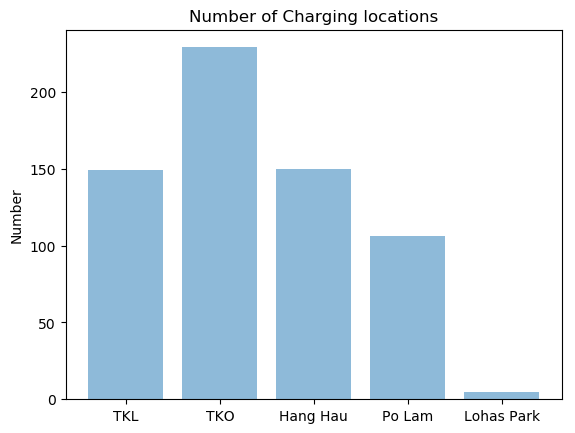

In [123]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('TKL', 'TKO', 'Hang Hau', 'Po Lam', 'Lohas Park')
y_pos = np.arange(len(objects))
performance = [num_charging_TKL, num_charging_TKO, num_charging_HH, num_charging_PL, num_charging_LP]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
df_HH_Steak.sizeplt.ylabel('Number')
plt.title('Number of Charging locations')

plt.show()

We then take a look on the number of restaurant of each type. In this analysis, we will cound the number of Japanese restaurants and Steak Houses.

In [136]:
sdata = (df_TKL_Steak.size, df_TKO_Steak.size, df_HH_Steak.size, df_PL_Steak.size, df_LP_Steak.size)

jdata = (df_TKL_Japanese.size, df_TKO_Japanese.size, df_HH_Japanese.size, df_PL_Japanese.size, df_LP_Japanese.size)

In [137]:
print('As an overview, there are ',sum(sdata), 'Steak Houses and ', sum(jdata), ' Japanese restaurants in Tseung Kwan O district.')


As an overview, there are  56 Steak Houses and  28  Japanese restaurants in Tseung Kwan O district.


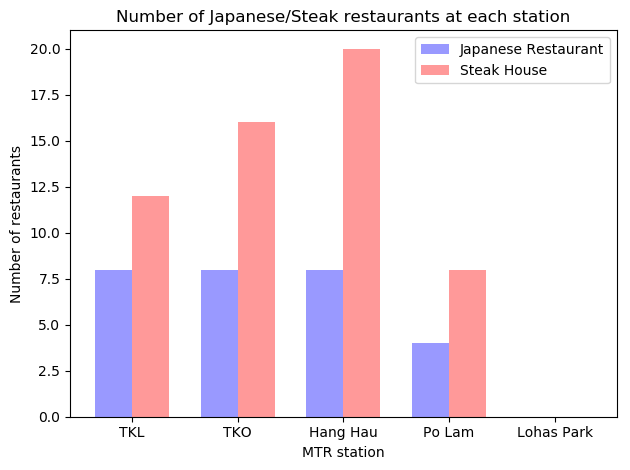

In [138]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, jdata, bar_width,
                alpha=opacity, color='b',
                label='Japanese Restaurant')

rects2 = ax.bar(index + bar_width, sdata, bar_width,
                alpha=opacity, color='r',
                label='Steak House')

ax.set_xlabel('MTR station')
ax.set_ylabel('Number of restaurants')
ax.set_title('Number of Japanese/Steak restaurants at each station')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('TKL', 'TKO', 'Hang Hau', 'Po Lam', 'Lohas Park'))
ax.legend()

fig.tight_layout()
plt.show()

There are some facts we obtained:
<br>
1. In this district, the number of steak house is 58 that is almost the double of the number of Japanese restaurants (=26).
<br>
2. The Hang Hau station has more restaurants nearby, and mostlt steak house.
<br>
3. In Lohas Park, there are no restaurants up to this moment. This fact has been reported in Hong Kong newspaper 'The Standard' (refer to Reference [3]). It is because Lohas Park is a relative remote district and the only shopping center near to the station is still under construction. 
<br>
4. Moreover, the Lohas Park has the minimum number of electric EV charging locations. 
<br>
5. TKO station has most electric EV charging locations around (=229), which is far more than other stations in Tseung Kwan O district.
<br>
6. There are many Sushi (=3) and Donburi restaurants (=2) but only 1 sha-bu-sha-bu restaurant at Po Lam station where is far away from the TKO city center.

## 6. Conclusion <a name="conclusion"></a>

To conclude, we suggest the client (ABC company) to set up a restaurant at Tseung Kwan O station. A Japanese style restaurant is preferred because there are already plenty of weatern style restaurants around so the competition would be keen if we open a steak house. We suggest the client to open a Japanese style hotpot (Sha-bu-Sha-bu) restaurant because the neigbhouring stations (i.e. Tiu Keng Leng and Hang Hau) do not have this kind of restaurant. Although Po Lam has one Sha-bu-Sha-bu restaurant but it is far away from Tseung Kwan O station. 

## 7. Reference <a name="reference"></a>

1. Foursquare Labs Inc. (2019). Place API, URL: https://foursquare.com
2. DATA.GOV.HK . The Standard.(2019). Electric vehicle charging station locations, URL: https://data.gov.hk/en-data/dataset/clp-team1-electric-vehicle-charging-location
3. Tereza Cai (12 Apr 2019). Lohas Park to get mall next year, Business, The Standard, URL: http://www.thestandard.com.hk/section-news.php?id=206840&sid=2